In [3]:
import pandas as pd
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt

In [1]:
def deriv(state, t, N, beta, gamma):
    S, I, R = state
    
    dSdt = -beta*S*I/N
    
    dIdt = beta*S*I/N - gamma*I
    
    dRdt = gamma*I
    
    return dSdt, dIdt, dRdt

<AxesSubplot:xlabel='day'>

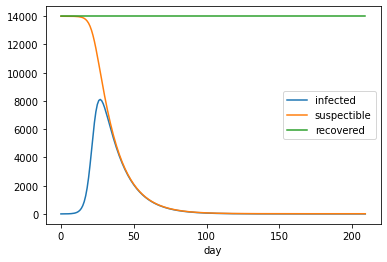

In [10]:
effective_contact_rate = 0.5
recovery_rate = 1/14

total_pop = 14000
recovered = 0
infected = 1
susceptible = total_pop - infected - recovered

days = range(0, 210)
ret = odeint(deriv, [susceptible, infected, recovered], days,
             args=(total_pop, effective_contact_rate, recovery_rate))
S, I, R = ret.T

df = pd.DataFrame({
        'suspectible': S,
        'infected': I,
        'recovered': R,
        'day': days
    })

df.plot(x='day',
        y=['infected', 'suspectible', 'recovered'],
        stacked=True)

In [10]:
russia = pd.read_csv('Data/CovidRussia.csv')

<AxesSubplot:xlabel='time'>

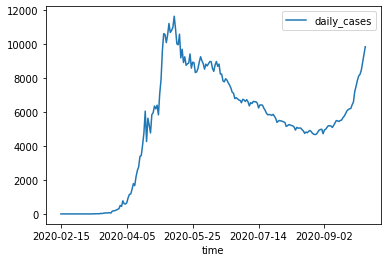

In [18]:
russia.plot(x='time',
       y=['daily_cases'])

In [41]:
beta = effective_contact_rate
gamma = recovery_rate
def SIR(t, y):
    S = y[0]
    I = y[1]
    R = y[2]
    return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
solution = solve_ivp(SIR, [0, 150], [susceptible, infected, recovered])

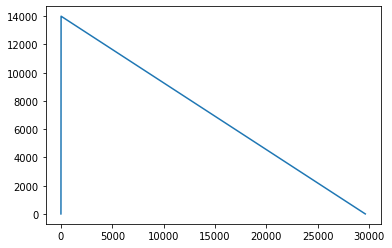

In [47]:
plt.plot(solution.y[1])

In [11]:
russia

,time,total_cases,daily_cases,total_currently_infected,total_death,death_per_day,new_recoveries
0,2020-02-15,2,0,0,0,0,0
1,2020-02-16,2,0,0,0,0,0
2,2020-02-17,2,0,0,0,0,0
3,2020-02-18,2,0,0,0,0,0
4,2020-02-19,2,0,0,0,0,0
...,...,...,...,...,...,...,...
227,2020-09-29,1167805,8232,194861,20545,160,6479
228,2020-09-30,1176286,8481,197307,20722,177,5858
229,2020-10-01,1185231,8945,200098,20891,169,5985
230,2020-10-02,1194643,9412,203270,21077,186,6054
